# TAT 

## Función de linea de curvatura utilizada

$\frac{z}{c}= 2.6376(\frac{x}{c})^3 - 1.5231(\frac{x}{c})^2 + 0.3151(\frac{x}{c}) + 0.0009$  $⇒$ for $0\leq \frac{x}{c} \leq 0.206376$ \\
$\frac{z}{c}= 0.0017(\frac{x}{c})^2 - 0.0333(\frac{x}{c}) + 0.0314$ $⇒$ for $0.206376\leq \frac{x}{c} \leq 1$ \\

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)
c = 4.193 # m
xu = 0.20637611

In [2]:
# Añadiendo la ecuación
x, t = sp.symbols("x t") # x = x/c
Line1 = 2.6376*x**3 - 1.5231*x**2 + 0.3151*x + 0.0009
Line2 = 0.0017*x**2 - 0.0333*x + 0.0314
Line1, Line2

In [3]:
# Derivando y Cambiando la variable por theta "t"
dzdx1 = sp.diff(Line1,x)
dzdx2 = sp.diff(Line2,x)
h = (1-sp.cos(t))/2
dzdt1 = dzdx1.subs(x,h)
dzdt2 = dzdx2.subs(x,h)
dzdt1,dzdt2

In [4]:
# Calculo theta de intercepción

theta = sp.acos(1 - (xu/2))

# Calculo de coeficientes
a0 = float((- 1/sp.pi * (sp.integrate(dzdt1*(sp.cos(t)-1), (t, 0, theta)) + sp.integrate(dzdt2*(sp.cos(t)-1), (t, theta, sp.pi)))).evalf())
A1 = float((2/sp.pi * (sp.integrate(dzdt1*(sp.cos(t)), (t, 0, theta)) + sp.integrate(dzdt2*(sp.cos(t)), (t, theta, sp.pi)))).evalf())
A2 = float((2/sp.pi * (sp.integrate(dzdt1*(sp.cos(2*t)), (t, 0, theta)) + sp.integrate(dzdt2*(sp.cos(2*t)), (t, theta, sp.pi)))).evalf())
a0, A1, A2

In [ ]:
# Calculo de coeficiente de lift

alfas = np.linspace(float((-sp.pi/2).evalf()),float((sp.pi/2).evalf()),1000)
cls = 2*float(sp.pi)*(alfas - a0)
cm = np.pi*(A2-A1)/4

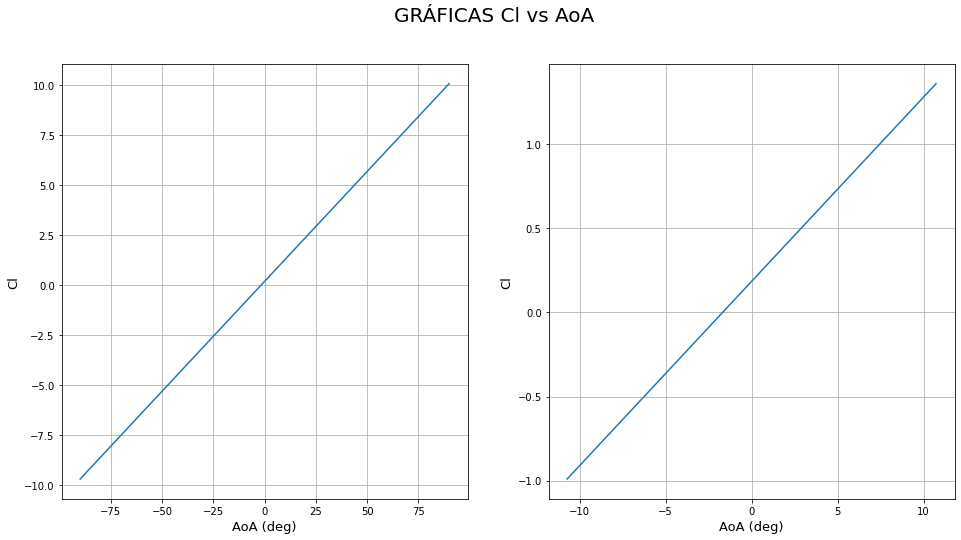

In [ ]:
# Grafica cl vs alfa

alfas_deg = np.rad2deg(alfas)

plt.figure(figsize=(16,8))
plt.subplot("121")
plt.suptitle("GRÁFICAS Cl vs AoA",fontsize=20)
plt.plot(alfas_deg,cls)
plt.xlabel("AoA (deg)",fontsize=13)
plt.ylabel("Cl",fontsize=13)
plt.grid()

plt.subplot("122")
plt.plot(alfas_deg[int(len(alfas)/2-60):int(len(alfas)/2+60)],cls[int(len(alfas)/2-60):int(len(alfas)/2+60)]) ## para verlo de mas cerca al cero
plt.xlabel("AoA (deg)",fontsize=13)
plt.ylabel("Cl",fontsize=13)
plt.grid()
plt.savefig("clTAT.jpg")

Se observa que realmente no hay corte con el (0,0) como sería en un perfil simétrico y que además no se puede predecir cuando será la entrada en perdida, como se había visto en clase. Para ver cual es el coeficiente en 0°:

In [ ]:
cl0 = float((- 2*sp.pi*a0).evalf())
print("AoA para cero sustentación: {:.3f}° y cl para cero AoA: {:.3f}".format(np.rad2deg(a0),cl0))
print("El Cm del perfil alar ubicado a 1/4 de la cuerda es {:.3f}".format(cm))

AoA para cero sustentación: -1.686° y cl para cero AoA: 0.185
El Cm del perfil alar ubicado a 1/4 de la cuerda es -0.005


# Vortex Panel Method

las funciones de las superficies superior e inferior son:

Upper surface:

$y = -11058x^6 + 9068.9x^5 - 2882.2x^4 + 449.24x^3 - 36.97x^2 + 1.8641x + 0.0062$ $⇒$ for $0\leq x \leq 0.2518372$ 
$y = -0.1142x^4 + 0.3853x^3 - 0.4989x^2 + 0.1658x + 0.0631$ $⇒$ for $0.2518372 < x \leq 1$ 

Lower surface:

$y = 725.67x^6 - 897.43x^5 + 433.21x^4 - 102.77x^3 + 12.464x^2 - 0.7836x - 0.0023$ $⇒$ for $0\leq x \leq 0.41917711$ \\
$y = 2.6641x^5 - 9.1693x^4 + 12.082x^3 - 7.5271x^2 + 2.239x - 0.2908$ $⇒$ for $0.41917711 < x \leq 1$

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
sp.init_printing(use_unicode=True)
c = 4.193 # m
v_inf = 220.8 # m/s
alt = (4550 + 7300)/2 # m - punto medio de FL150 y FL240

In [ ]:
## Añadiendo las funciones

x = sp.symbols("x")

#Upper surface:

us1 = -11058*x**6 + 9068.9*x**5 - 2882.2*x**4 + 449.24*x**3 - 36.97*x**2 + 1.8641*x + 0.0062  
us2 = -0.1142*x**4 + 0.3853*x**3 - 0.4989*x**2 + 0.1658*x + 0.0631
usi = 0.2518372 

#Lower surface

ls1 = 725.67*x**6 - 897.43*x**5 + 433.21*x**4 - 102.77*x**3 + 12.464*x**2 - 0.7836*x - 0.0023
ls2 = 2.6641*x**5 - 9.1693*x**4 + 12.082*x**3 - 7.5271*x**2 + 2.239*x - 0.2908
lsi = 0.36785185

Inicialmente se va a trabajar con igual numero de nodos en la superficie superior como en la inferior y con un espacio dx entre cada par de nodos de igual tamaño, se puede trabajar con el espaciamiento que se desee definiendo el xs a gusto.

In [ ]:
# paneles

N = 50 #
xs2 = np.linspace(0,1,int(N/2+1))
xs1 = xs2.copy()
xs1[::-1].sort()
xs = np.concatenate((xs1[:-1],xs2))
xs

array([1.  , 0.96, 0.92, 0.88, 0.84, 0.8 , 0.76, 0.72, 0.68, 0.64, 0.6 ,
       0.56, 0.52, 0.48, 0.44, 0.4 , 0.36, 0.32, 0.28, 0.24, 0.2 , 0.16,
       0.12, 0.08, 0.04, 0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28,
       0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72,
       0.76, 0.8 , 0.84, 0.88, 0.92, 0.96, 1.  ])

100%|██████████| 20/20 [00:05<00:00,  3.41it/s]


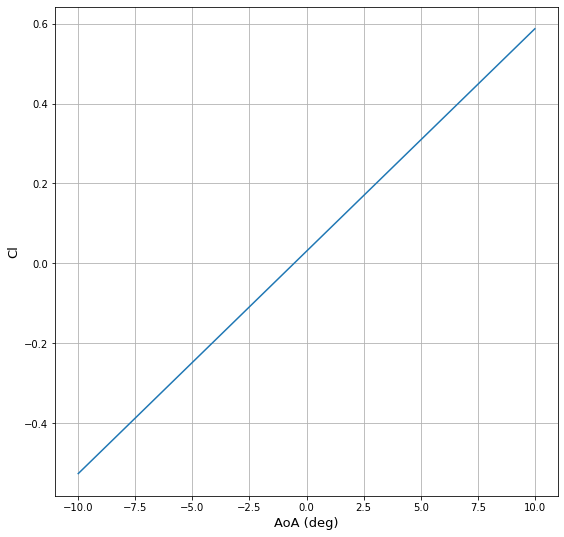

In [ ]:

ys = np.zeros(N+1)
X = np.zeros((5,N)) # Datos de cada panel: coordenadas punto medio, inclinación, longitud del panel y vector normal del panel.
for i in range(N):
  x1 = xs[i]
  x2 = xs[i+1]
  if i<int(N/2): # Lower surface
    ys[i] = float(ls1.subs(x,x1).evalf()) if x1 <= lsi else float(ls2.subs(x,x1).evalf())
    ys[i+1] = float(ls1.subs(x,x2).evalf()) if x2 <= lsi else float(ls2.subs(x,x2).evalf())
  else: # Uper surface
    ys[i] = float(us1.subs(x,x1).evalf()) if x1 <= usi else float(us2.subs(x,x1).evalf())
    ys[i+1] = float(us1.subs(x,x2).evalf()) if x2 <= usi else float(us2.subs(x,x2).evalf())
  ys[0],ys[-1] = 0, 0
  ys[int(N/2)] = 0  
  y1, y2 = ys[i], ys[i+1]
  dx = x2 - x1
  dy = y2 - y1
  X[0,i] = (x1+x2)/2 # X
  X[1,i] = (y1+y2)/2 # Y
  X[2,i] = np.arctan2(dy,dx) # theta
  if X[2,i] < 0:
    X[2,i] += 2*np.pi
  X[3,i] = (dx**2 + dy**2)**0.5 # s
  
M = 20
Alfas = np.linspace(float(-np.pi/18),float(np.pi/18),M)
CLs = np.zeros(M)
Cls = np.zeros(M)
for z in tqdm(range(M)):
  K = np.zeros((N,N))
  L = np.zeros((N,N))
  F = np.zeros(N) # Matriz B 
  K[N-1,0], K[N-1,N-1] = 1, 1
  
  ## Calculo de las matrices K y L
  
  for i in range(N-1):
    X[4,i] = X[2,i] + np.pi/2 - Alfas[z]
    if X[4,i] > 2*np.pi:
      X[4,i] -= 2*np.pi
    F[i] = -2*np.pi*v_inf*np.cos(X[4,i])
    for j in range(N):
      if i != j:
        #A = -(xs[j]-X[0,i])*np.cos(X[2,j])-(ys[j]-X[1,i])*np.sin(X[2,j])
        A = -(X[0,i]-xs[j])*np.cos(X[2,j])-(X[1,i]-ys[j])*np.sin(X[2,j])
        #B = (xs[j]-X[0,i])**2+(ys[j]-X[1,i])**2
        B = (X[0,i]-xs[j])**2+(X[1,i]-ys[j])**2
        Cn = -np.cos(X[2,i]-X[2,j])
        #Dn = (xs[j]-X[0,i])*np.cos(X[2,i])+(ys[j]-X[1,i])*np.sin(X[2,i])
        Dn = (X[0,i]-xs[j])*np.cos(X[2,i])+(X[1,i]-ys[j])*np.sin(X[2,i])
        Ct = np.sin(X[2,j]-X[2,i])
        #Dt = (xs[j]-X[0,i])*np.sin(X[2,i])-(ys[j]-X[1,i])*np.cos(X[2,i])
        Dt = (X[0,i]-xs[j])*np.sin(X[2,i])-(X[1,i]-ys[j])*np.cos(X[2,i])
        E = (B-A**2)**0.5
        if (E == 0 or np.iscomplex(E) or np.isnan(E) or np.isinf(E)):       
          K[i,j] = 0                                                      
          L[i,j] = 0 
        else:
          k = 0.5*Cn*(np.log((X[3,j]**2 + 2*A*X[3,j] + B)/B))+((Dn-A*Cn)/E)*(np.arctan2((X[3,j]+A),E)-np.arctan2(A,E))
          l = 0.5*Ct*(np.log((X[3,j]**2+2*A*X[3,j]+B)/B))+((Dt-A*Ct)/E)*(np.arctan2((X[3,j]+A),E)-np.arctan2(A,E))
          K[i,j] = k
          L[i,j] = l
      if (np.iscomplex(K[i,j]) or np.isnan(K[i,j]) or np.isinf(K[i,j])): 
        K[i,j] = 0                                                          
      if (np.iscomplex(L[i,j]) or np.isnan(L[i,j]) or np.isinf(L[i,j])):      
        L[i,j] = 0
      

  G = np.linalg.solve(K,F) # vector de gamma
  
  ## Calculo de vt y de cp

  vt = np.zeros(N)
  cp = np. zeros(N)
  for i in range(N):
    vt[i] = v_inf*np.sin(X[4,i])
    for j in range(N):
      if i != j:
        vt[i] -= G[j]*L[i,j]/(2*np.pi)
      else:
        vt[i] += G[j]/2
    cp[i]=1-(vt[i]/v_inf)**2

  ## Calculo cl
  cps = np.zeros(int(N/2))
  for i in range(int(N/2)):
    cps[i] = cp[N-i-1]-cp[i]
  
  h = xs[0]-xs[1]
  Cls[z] = h*(cps[-1]+cps[0])/2
  for i in range(1,len(cps)-1):
    Cls[z] += h*(cps[i])
  Cls[z] /= c
   #Calculo cl
  for i in range(int(N/2)-1):
    Cls[z] += abs(xs[i+1]-xs[i])*(cps[i]+cps[i+1])/(2*c)

# Aplanando la curva

m = (max(Cls)-Cls[0])/(Alfas[np.where(Cls==max(Cls))[0][0]]-Alfas[0])
m = (max(Cls)-Cls[0])/(Alfas[np.where(Cls==max(Cls))[0][0]]-Alfas[0])
b = -Alfas[0]*m + Cls[0]
Cls1 = m*Alfas + b 

plt.figure(figsize=(9,9))
plt.plot(np.rad2deg(Alfas),Cls1)
plt.xlabel("AoA (deg)",fontsize=13)
plt.ylabel("Cl",fontsize=13)
plt.grid()

### Comparación

In [ ]:
print("TAT")
print("AoA para cero sustentación: {:.3f}° y cl para cero AoA: {:.3f}".format(np.rad2deg(a0),cl0))

print("VPM")
print("AoA para cero sustentación: {:.3f}° y cl para cero AoA: {:.3f}".format(np.rad2deg(-b/m),b))


TAT
AoA para cero sustentación: -1.686° y cl para cero AoA: 0.185
VPM
AoA para cero sustentación: -0.549° y cl para cero AoA: 0.031


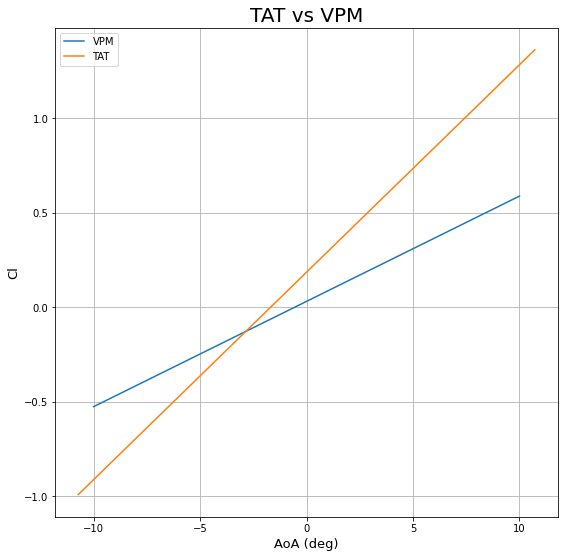

In [ ]:
plt.figure(figsize=(9,9))
plt.title("TAT vs VPM",fontsize=20)
plt.plot(np.rad2deg(Alfas),Cls1,label="VPM")
plt.plot(alfas_deg[int(len(alfas)/2-60):int(len(alfas)/2+60)],cls[int(len(alfas)/2-60):int(len(alfas)/2+60)],label="TAT")
plt.xlabel("AoA (deg)",fontsize=13)
plt.ylabel("Cl",fontsize=13)
plt.grid()
plt.legend()

# Zona de pruebas:

0 1 A: 0.1503734649588152 B: 0.02261512552860798 Cn: -0.9998535353018112 Dn -0.1503808186462292 Ct -0.017114553586634017 Dt -0.0008572700262461531 E 0.0017165561126732953 -0.510512969001237 -0.004173966154620049
0 2 A: 0.2506123460106856 B: 0.06280940167968331 Cn: -0.9999999920683788 Dn -0.2506121312576983 Ct -0.0001259493641808279 Dt -0.0017208562280128688 E 0.0016892917757766266 -0.3366094072652611 -0.001968947916521856
0 3 A: 0.3508942593510303 B: 0.12312678895331264 Cn: -0.999985144887724 Dn -0.35088856823911363 Ct -0.005450688385655133 Dt -0.00200040806275828 E 8.779410298898803e-05 -0.25131437058757033 -0.001425458497657353
0 4 A: 0.4508685572953151 B: 0.20343874798397096 Cn: -0.9993211460722026 Dn -0.4510230557503771 Ct -0.036840833499524335 Dt -0.004117179321237879 E 0.012501680943462155 -0.20039013793165233 -0.002350499568338154
0 5 A: 0.5503287717322425 B: 0.30360206806390555 Cn: -0.9978079435768836 Dn -0.550922989363434 Ct -0.06617633817967475 Dt -0.009269727868890583 E 0.02

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars


 3 A: -0.64653931156674 B: 0.4231267889533129 Cn: 0.8801903002268174 Dn -0.5351373963334177 Ct 0.4746209386306349 Dt -0.369803672235422 E 0.07151019194575528 -0.13668910168819598 -0.09643598577763715
10 4 A: -0.5483210844565861 B: 0.303438747983971 Cn: 0.8648565457113473 Dn -0.44773674551869475 Ct 0.5020190786615947 Dt -0.3208902533519811 E 0.0527516475981969 -0.1616711582412269 -0.11839968478109061
10 5 A: -0.4496119841918621 B: 0.20360206806390552 Cn: 0.8497384480119644 Dn -0.3619694079834287 Ct 0.5272044859162507 Dt -0.26940715608170407 E 0.038093723038871534 -0.19914180680621218 -0.1518093226279051
10 6 A: -0.3501916215499093 B: 0.12361864046804293 Cn: 0.840763286130092 Dn -0.27744106931696133 Ct 0.5414028968298278 Dt -0.21597475205288225 E 0.03137624362934527 -0.26035098095624387 -0.20975513982522237
10 7 A: -0.2508211438974142 B: 0.06350391356031403 Cn: 0.8278671720426489 Dn -0.19399102639441707 Ct 0.5609241886869446 Dt -0.1608458741738644 E 0.02434475989420838 -0.379036339382856

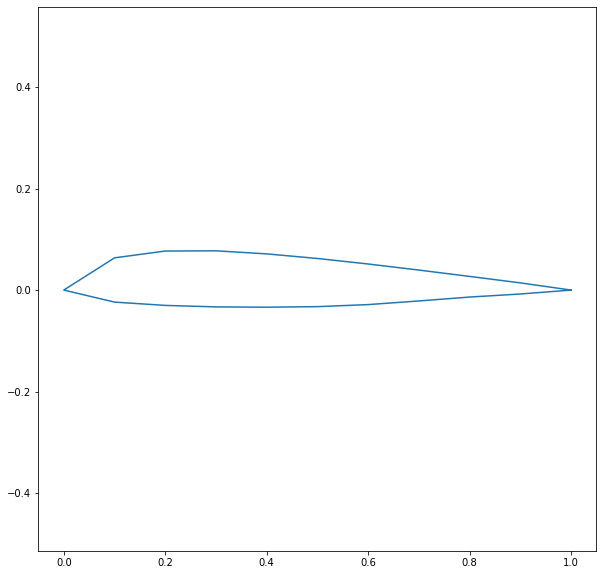

In [ ]:
##N = 20 #
xs2 = np.linspace(0,1,int(N/2+1))
xs1 = xs2.copy()
xs1[::-1].sort()
xs = np.concatenate((xs1[:-1],xs2))
ys = np.zeros(N+1)
X = np.zeros((5,N)) # Datos de cada panel: coordenadas punto medio, inclinación, longitud del panel y vector normal del panel.
dxs = np.zeros((2,N))
for i in range(N):
  x1 = xs[i]
  x2 = xs[i+1]
  if i<int(N/2): # Lower surface
    ys[i] = float(ls1.subs(x,x1).evalf()) if x1 <= lsi else float(ls2.subs(x,x1).evalf())
    ys[i+1] = float(ls1.subs(x,x2).evalf()) if x2 <= lsi else float(ls2.subs(x,x2).evalf())
  else: # Uper surface
    ys[i] = float(us1.subs(x,x1).evalf()) if x1 <= usi else float(us2.subs(x,x1).evalf())
    ys[i+1] = float(us1.subs(x,x2).evalf()) if x2 <= usi else float(us2.subs(x,x2).evalf())
  ys[0],ys[-1] = 0, 0
  ys[int(N/2)] = 0  
  y1, y2 = ys[i], ys[i+1]
  dx = x2 - x1
  dy = y2 - y1
  dxs[:,i] = dx, dy
  X[0,i] = (x1+x2)/2 # X
  X[1,i] = (y1+y2)/2 # Y
  X[2,i] = np.arctan2(dy,dx) # theta
  if X[2,i] < 0:
    X[2,i] += 2*np.pi
  X[3,i] = (dx**2 + dy**2)**0.5 # s
  ys[i], ys[i+1] = y1, y2 

ys[0],ys[-1] = 0, 0
ys[int(N/2)] = 0

plt.figure(figsize=(10,10))
plt.plot(xs,ys)
plt.axis("equal")

Alfa = float(-np.pi/6)
#CLs = np.zeros(M)
#Cls = np.zeros(M)

K = np.zeros((N,N))
L = np.zeros((N,N))
F = np.zeros(N) # Matriz B 
K[N-1,0], K[N-1,N-1] = 1, 1

## Calculo de las matrices K y L
X[4,-1] = X[2,-1] + np.pi/2 - Alfa
X[4,-1] -= 2*np.pi if X[4,-1] > 2*np.pi else X[4,-1]
for i in range(N-1):
  X[4,i] = X[2,i] + np.pi/2 - Alfa
  if X[4,i] > 2*np.pi:
    X[4,i] -= 2*np.pi
  F[i] = -2*np.pi*v_inf*np.cos(X[4,i])
  for j in range(N):
    if i != j:
      A = -(xs[i]-X[0,j])*np.cos(X[2,j])-(ys[i]-X[1,j])*np.sin(X[2,j])
      #A = -(X[0,i]-xs[j])*np.cos(X[2,j])-(X[1,i]-ys[j])*np.sin(X[2,j])
      B = (xs[i]-X[0,j])**2+(ys[i]-X[1,j])**2
      #B = (X[0,i]-xs[j])**2+(X[1,i]-ys[j])**2
      Cn = -np.cos(X[2,i]-X[2,j])
      Dn = (xs[i]-X[0,j])*np.cos(X[2,i])+(ys[i]-X[1,j])*np.sin(X[2,i])
      #Dn = (X[0,i]-xs[j])*np.cos(X[2,i])+(X[1,i]-ys[j])*np.sin(X[2,i])
      Ct = np.sin(X[2,j]-X[2,i])
      Dt = (xs[i]-X[0,j])*np.sin(X[2,i])-(ys[i]-X[1,j])*np.cos(X[2,i])
      #Dt = (X[0,i]-xs[j])*np.sin(X[2,i])-(X[1,i]-ys[j])*np.cos(X[2,i])
      E = (B-A**2)**0.5
      if (E == 0 or np.iscomplex(E) or np.isnan(E) or np.isinf(E)):       
        K[i,j] = 0                                                      
        L[i,j] = 0 
      else:
        k = 0.5*Cn*(np.log((X[3,j]**2 + 2*A*X[3,j] + B)/B))+((Dn-A*Cn)/E)*(np.arctan2((X[3,j]+A),E)-np.arctan2(A,E))
        l = 0.5*Ct*(np.log((X[3,j]**2+2*A*X[3,j]+B)/B))+((Dt-A*Ct)/E)*(np.arctan2((X[3,j]+A),E)-np.arctan2(A,E))
        K[i,j] = k
        L[i,j] = l
      print(i,j,"A:",A,"B:",B,"Cn:",Cn,"Dn",Dn,"Ct",Ct,"Dt",Dt,"E",E,K[i,j],L[i,j])
    if (np.iscomplex(K[i,j]) or np.isnan(K[i,j]) or np.isinf(K[i,j])): 
      K[i,j] = 0                                                          # Set K value equal to zero
    if (np.iscomplex(L[i,j]) or np.isnan(L[i,j]) or np.isinf(L[i,j])):      # If L term is complex or a NAN or an INF
      L[i,j] = 0
    #else:
      # L[i,j] = -1

G = np.linalg.solve(K,F) # vector de gamma

## Calculo de vt y de cp

vt = np.zeros(N)
cp = np. zeros(N)
for i in range(N):
  vt[i] = v_inf*np.sin(X[4,i])
  for j in range(N):
    if i != j:
      vt[i] -= G[j]*L[i,j]/(2*np.pi)
    else:
      vt[i] += G[j]/2
  cp[i]=1-(vt[i]/v_inf)**2

## Calculo cl
#CN = -cp*X[3,:]*np.sin(X[4,:])  
#CA = -cp*X[3,:]*np.cos(X[4,:])
# Compute lift, drag, and moment coefficients
#CLs[z] = sum(CN*np.cos(Alfas[z])) - sum(CA*np.sin(Alfas[z]))
#CM = sum(cp*(X[0,:]-0.25)*S*np.cos(X[2,:])

## Calculo cl
cps = np.zeros(int(N/2))
for i in range(int(N/2)):
  cps[i] = cp[N-i-1]-cp[i]
#Cls[z] = scipy.integrate.trapezoid(cps,dx)
h = xs[0]-xs[1]
Cls = h*(cps[-1]+cps[0])/(2*c)
for i in range(1,len(cps)-1):
  Cls += h*(cps[i])/c

print("xs:",xs)
print("ys:",ys)
print("dx:",dxs[0,:])
print("dy:",dxs[1,:])
print("xp:",X[0,:])
print("yp:",X[1,:])
print("theta:",X[2,:])
print("S:",X[3,:])
print("Phi:",X[4,:])
print(Cls)

NameError: ignored

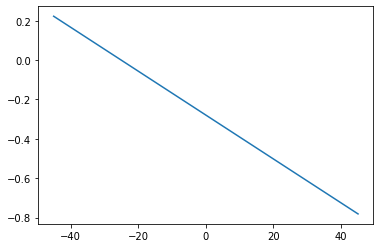

In [ ]:
m = (Cls[1]-Cls[0])/(Alfas[1]-Alfas[0])
b = -Alfas[0]*m + Cls[0]
Cls1 = np.zeros(M)
for i in range(M):
  Cls1[i] = m*Alfas[i] + b 

plt.figure()
plt.plot(np.rad2deg(Alfas),Cls1)
plt.plot(alfas_deg[int(len(alfas)/2-300):int(len(alfas)/2+300)],cls[int(len(alfas)/2-300):int(len(alfas)/2+300)])
plt.grid()

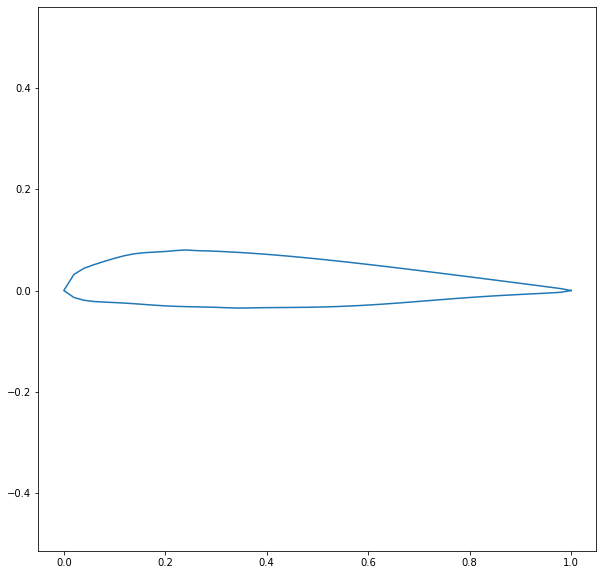

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(xs,ys)
plt.axis("equal")

(array([1.  , 0.98]), array([ 0.        , -0.00346007]))

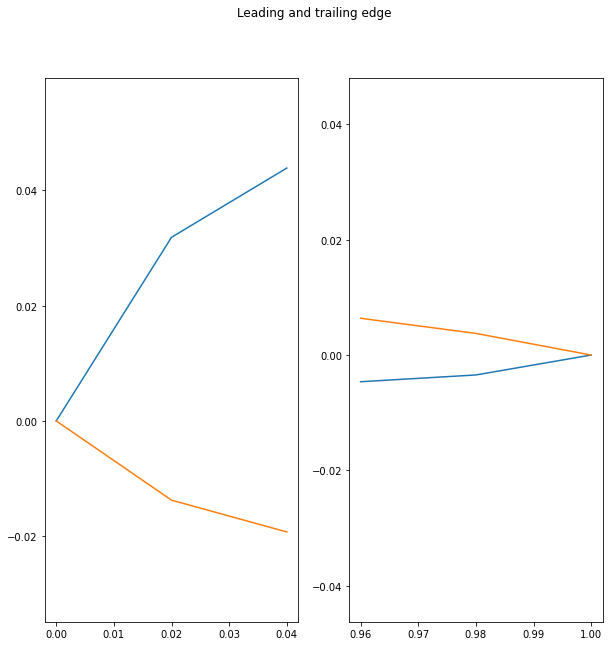

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle("Leading and trailing edge")
plt.subplot("121")
plt.plot(xs[int(N/2):int(N/2)+3],ys[int(N/2):int(N/2)+3])
plt.plot(xs[int(N/2)-2:int(N/2)+1],ys[int(N/2)-2:int(N/2)+1])
plt.axis("equal")
plt.subplot("122")
plt.plot(xs[:3],ys[:3])
plt.plot(xs[-3:],ys[-3:])
plt.axis("equal")
xs[:2],ys[:2]

In [ ]:
K = np.zeros((N,N))
L = np.zeros((N,N))
K[N-1,0], K[N-1,N-1] = 1, 1

for j in range(N-1):
  i = j+1
  A = -(xs[i]-X[0,j])*np.cos(X[2,j])-(ys[i]-X[1,j])*np.sin(X[2,j])
  B = (xs[i]-X[0,j])**2+(ys[i]-X[1,j])**2
  Cn = -np.cos(X[2,i]-X[2,j])
  Dn = (xs[i]-X[0,j])*np.cos(X[2,i])+(ys[i]-X[1,j])*np.sin(X[2,i])
  Ct = np.sin(X[2,j]-X[2,i])
  Dt = (xs[i]-X[0,j])*np.sin(X[2,i])-(ys[i]-X[1,j])*np.cos(X[2,i])
  E = (B-A**2)**0.5
  K[i,j] = (Cn/2)*(np.log((X[3,j]**2+2*A*X[3,j]+B)/B))+((Dn-A*Cn)/E)*(np.arctan2(X[3,j]+A,E)-np.arctan2(A,E))
  L[i,j] = (Ct/2)*(np.log((X[3,j]**2+2*A*X[3,j]+B)/B))+((Dt-A*Ct)/E)*(np.arctan2(X[3,j]+A,E)-np.arctan2(A,E))
  print(A,B,Cn,Dn,Ct,Dt,E)

-0.020040092575951757 0.00040160531045271673 -0.9999354156787712 0.020038798300175378 0.011365054831499249 -0.0002277567509540127 0.0
-0.020026966967627107 0.0004010794059224273 -0.9999999537776959 0.02002696604193455 0.00030404704564690563 -6.0891401397801265e-06 0.0
-0.020026651584317202 0.0004010667736796347 -0.9999817834767843 0.020026286768353684 -0.006035951837907584 0.00012087990443749837 0.0
-0.020033261105482366 0.0004013315505204325 -0.9999642191526927 0.020032544298425683 -0.00845933888347839 0.00016946814463248186 nan
-0.020043761117414148 0.00040175235973196325 -0.9999696663980837 0.020043153117943507 -0.0077888563798040236 0.00015611797665464637 0.0
-0.020054708285794576 0.00040219132442831753 -0.9999882387248147 0.020054472416851665 -0.004849990932271616 9.726515333546067e-05 nan
-0.020062146052203068 0.0004024897042199271 -0.9999998938187449 0.02006214392197922 -0.00046082805788268577 9.24519980219753e-06 0.0
-0.020062877599736836 0.00040251905758202216 -0.9999895522945

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
## Calculo cl
#for i in range(int(N/2)):
# Cls[z] += abs(xs[i+1]-xs[i])*(cp[N-i-1]+cp[i])/2